# ANALISI DATI ESERCIZIO 3.1

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rcParams.update({'font.size': 14})

In [9]:
sum_prog= np.loadtxt("Esercizio3_1/Econofisica.txt")
sum_prog2= np.loadtxt("Esercizio3_1/Econofisica_2.txt")


In questo esercizio mostro il calcolo del prezzo di un opzione call e di un opzione put, con l'utilizzo di due metodi diversi. 

Opzione call: $$C_i = \exp(-rT)max\left[0,S_i(T)-K\right].$$


Opzione put:  $$P_i=\exp(-rT)max\left[S_i(T)-K,0\right].$$


Il primo metodo è la valutazione esatta che calcola il prezzo dell'opzione europea utilizzando un moto browniano geometrico, che a differnza di quello classico non assume mai valori negativi. L'opzione partiva da un valore $S(0)=100$, tempo di maturazione $T=1$, uno strike price $K=100$, un tasso d'interesse a rischio nullo $r=0.1$ ed una volatilità $\sigma=0.25$. Nel caso della formula esatta il valore $S(T)$ è calcolato nella seguente modo: $$ S_i(T) = S(0)\exp\left[(r-\frac{\sigma^2}{2})T + \sigma Z_i\sqrt{T}\right]$$

con $Z_i$ variabile gaussiana.

Ho estratto $M=10^5$ numeri da una distribuzione gaussiana $n(0,1)$, calcolando per ogni simulazione il valore dell'opzione put e dell'opzione call. Ho utilizzato anche in qeusto caso la media a blocchi con $N=100$. 

Il secondo metodo è la valutazione con cammino discreto, utilizzando un moto browniano geometrico, in cui dividiamo l'intervallo [0,T] in 100 passi e calcoliamo per ogni passo il valore $S(t)$ con la seguente formula: $$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$

Anche in questo caso faccio $M=10^4$ simulazioni ed utilizzo una media a blocchi $N=100$ per stimare le incertezze.

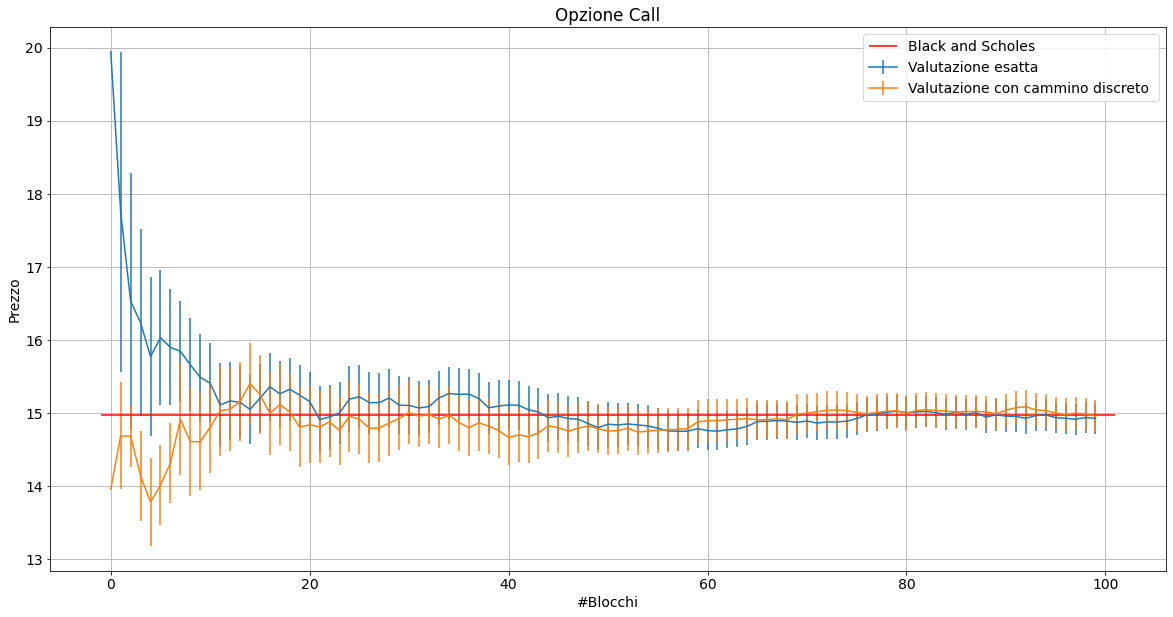

In [10]:
x = np.arange(100)
plt.figure(figsize=(20,10));
plt.errorbar(x,sum_prog[:,0],yerr=sum_prog[:,1],label="Valutazione esatta")
plt.errorbar(x,sum_prog2[:,0],yerr=sum_prog2[:,1],label="Valutazione con cammino discreto ")
plt.hlines(14.975790778311286,-1,101,color="r",label="Black and Scholes")
plt.xlabel('#Blocchi')
plt.ylabel('Prezzo')
plt.title("Opzione Call")
plt.legend()
plt.grid(True)
plt.show()

Per l'opzione call nessuno dei due metodi riesce ad avere una buona stima del valore dell'opzione call al tempo di maturazione. Il valore teorico è stato calcolato utilizzando la formula di Black and Scholes.

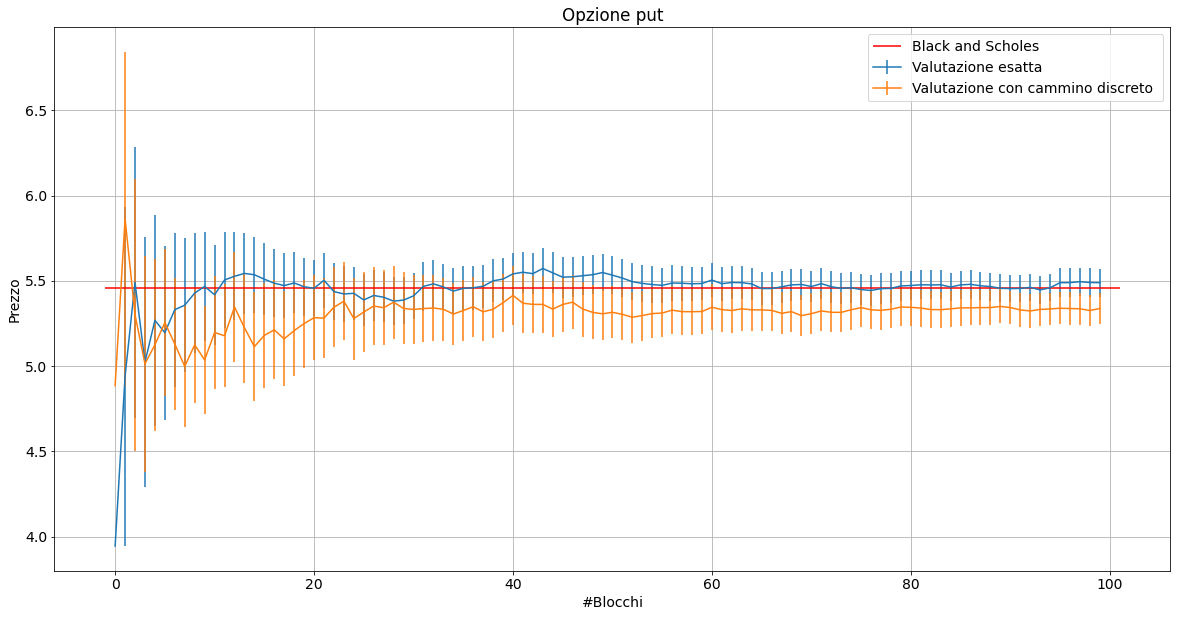

In [11]:
x = np.arange(100)
plt.figure(figsize=(20,10));
plt.errorbar(x,sum_prog[:,2],yerr=sum_prog[:,3],label="Valutazione esatta")
plt.errorbar(x,sum_prog2[:,2],yerr=sum_prog2[:,3],label="Valutazione con cammino discreto ")
plt.hlines(5.4595325819072364,-1,101,color="r",label="Black and Scholes")
plt.xlabel('#Blocchi')
plt.ylabel('Prezzo')
plt.title("Opzione put")
plt.legend()
plt.grid(True)
plt.show()

Per l'opzione put la valutazione esatta da una buona stima del valore dell'opzione al tempo di maturazione. Anche in questo caso il valore esatto è stato calcolato con la formula di Black and Scholes.